# EMAIL SPAM DETECTION WITH MACHINE LEARNING

**[This notebook was created by DAJAH VINCENT](https://www.linkedin.com/in/dajahvincent/)**

**Importing Data Manipulation Libraries**

In [30]:
#Importing data manipulation and visualization libraries

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [31]:
#Reading the CSV file containing the datasets
spam_mail = pd.read_csv('spam.csv', encoding = 'latin')

In [32]:
#Viewing the first 5 and last 5 rows from the dataset
spam_mail

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [33]:
#Viewing the dataframes columns name 
spam_mail.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:

spam_mail.isna().sum()

In [34]:

spam_mail.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [35]:
spam_mail = spam_mail.drop(columns = ["Unnamed: 2","Unnamed: 3","Unnamed: 4"], axis = 1, errors = 'ignore')

In [36]:
spam_mail

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [37]:
df = spam_mail.rename(columns = {'v1': 'Class', 'v2': 'Text'})

df

,Class,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [38]:
df.duplicated().sum()

403

In [39]:
df = df.drop_duplicates()
df

,Class,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
#df['Class'].replace({"ham": 0, "spam": 1}, inplace=True)
#df

In [40]:
df.duplicated().sum()

0

**Training & Evaluation**

* Importing all Necessary Machine Learning Models & Libraries

In [41]:
# Import necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


* Using Support Ventor Machine Model


In [42]:

# Assigning the feature and target columns from the datasets
X = df['Text']  # Feature
y = df['Class']  # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Convert text data into TF-IDF vectors
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the max_features
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train an SVM model
clf = SVC(kernel='linear', C=1.0, probability=True)
clf.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.9874274661508704

Classification Report:
               precision    recall  f1-score   support

         ham       0.99      1.00      0.99       889
        spam       0.98      0.93      0.95       145

    accuracy                           0.99      1034
   macro avg       0.98      0.96      0.97      1034
weighted avg       0.99      0.99      0.99      1034



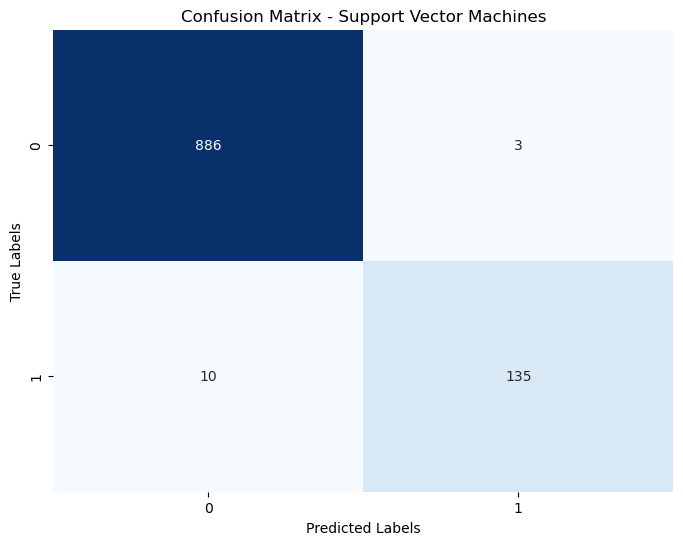

In [43]:
# Assuming you already have 'y_test' (true labels) and 'y_pred' (predicted labels)
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Support Vector Machines')
plt.show()


* Using Random Forest Classifier

In [44]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Class'], test_size = 0.2, random_state = 42)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features = 1000)  # The max_features can be adjusted as deem fit by users 

# Transform text data into numerical features
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

# Predictions on the test set
y_pred = rf_classifier.predict(X_test_tfidf)


In [45]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification report (precision, recall, F1-score)
print(classification_report(y_test, y_pred))


Accuracy: 0.9826
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       889
        spam       0.99      0.88      0.93       145

    accuracy                           0.98      1034
   macro avg       0.99      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034



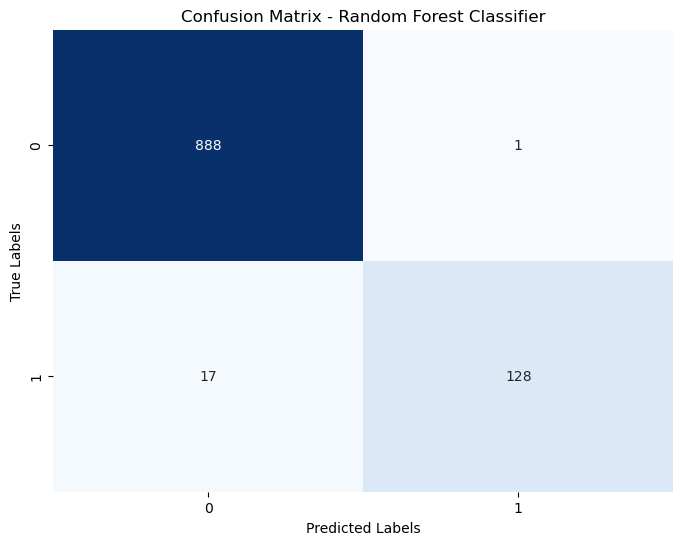

In [46]:
# Assuming you already have 'y_test' (true labels) and 'y_pred' (predicted labels)
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()


* Using Logistics Regression Model 

In [47]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Class'], test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features = 4000)  # Adjust max_features as needed

# Transform text data into numerical features
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize and train the logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train_tfidf, y_train)

# Predictions on the test set
y_pred = logreg_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print(classification_report(y_test, y_pred))

Accuracy: 0.9710
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       889
        spam       0.97      0.82      0.89       145

    accuracy                           0.97      1034
   macro avg       0.97      0.91      0.94      1034
weighted avg       0.97      0.97      0.97      1034



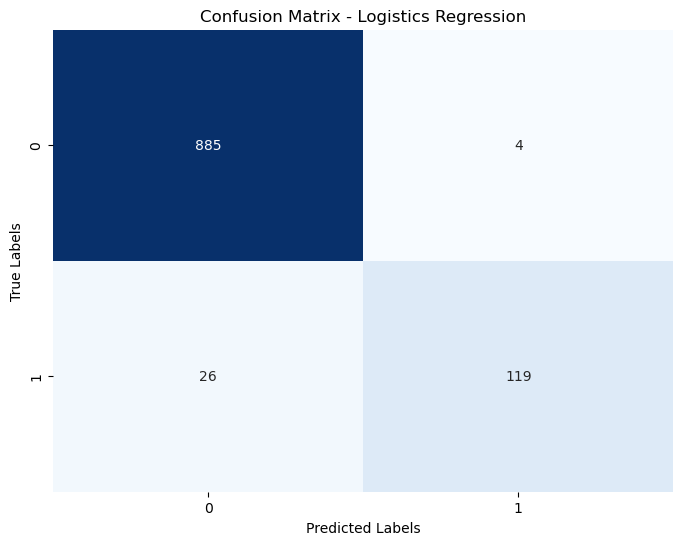

In [48]:
# Assuming you already have 'y_test' (true labels) and 'y_pred' (predicted labels)
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistics Regression')
plt.show()


* Using Naive Bayes - MultinomialNB Model

In [49]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Class'], test_size = 0.2, random_state = 42)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed

# Transform text data into numerical features
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize and train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Predictions on the test set
y_pred = nb_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print(classification_report(y_test, y_pred))


Accuracy: 0.9768
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       889
        spam       1.00      0.83      0.91       145

    accuracy                           0.98      1034
   macro avg       0.99      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034



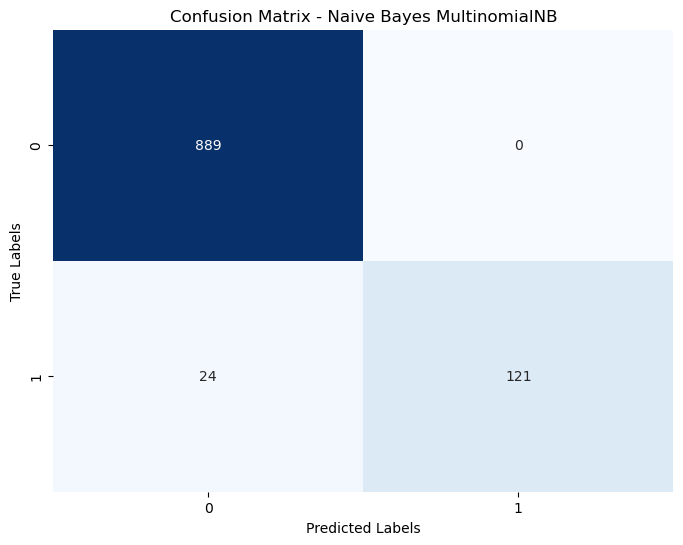

In [50]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Naive Bayes MultinomialNB')
plt.show()


**Testing the Model Using Unseen Text & Text From the Training Datasets**

* Using Unseen Text to Test the Prediction of the Model

In [51]:
#Using unseen text to test the models prediction

# Example text for prediction
new_text = input("Please type a word here: ") 

# Transform the new text into numerical features
new_text_tfidf = vectorizer.transform([new_text])

# Make predictions
predicted_class = nb_classifier.predict(new_text_tfidf)

print(f"Predicted class: {predicted_class[0]}")


Please type a word here: Hi you have won 20000 dollars, click of this link to claim you prize money www.dajah.com 
Predicted class: spam


The model was tested with a completetely different text that is not on the training data set and it with key words like "Won", "20000 dollar" and a hyperlink "www.dajah.com" and the model correctly predicted the text as Spam

* Randomly Sampling Text from the Datase to Test the Prediction of the Model

In [52]:
import random

# Sample 10 random indices from the test set
sample_indices = random.sample(range(len(X_test)), 10)

# Initialize lists to store results
sample_texts = []
true_labels = []
predicted_labels = []

for idx in sample_indices:
    sample_text = X_test.iloc[idx]
    sample_text_tfidf = vectorizer.transform([sample_text])
    predicted_class = nb_classifier.predict(sample_text_tfidf)[0]
    true_label = y_test.iloc[idx]
    
    sample_texts.append(sample_text)
    true_labels.append(true_label)
    predicted_labels.append(predicted_class)

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Sample Text': sample_texts,
    'True Label': true_labels,
    'Predicted Label': predicted_labels
})

# Display the results
print(results_df)

                                         Sample Text True Label  \
0  A little. Meds say take once every 8 hours. It...        ham   
1  FREE MSG:We billed your mobile number by mista...       spam   
2  \Hello-/@drivby-:0quit edrunk sorry iff pthis ...        ham   
3  Is there coming friday is leave for pongal?do ...        ham   
4  Well obviously not because all the people in m...        ham   
5  Your gonna be the death if me. I'm gonna leave...        ham   
6  URGENT! We are trying to contact U. Todays dra...       spam   
7  Awesome, I remember the last time we got someb...        ham   
8  I'd say that's a good sign but, well, you know...        ham   
9                 You will go to walmart. I.ll stay.        ham   

  Predicted Label  
0             ham  
1            spam  
2             ham  
3             ham  
4             ham  
5             ham  
6            spam  
7             ham  
8             ham  
9             ham  


Thanks once again 